## 공용 코드

In [1]:
# 파이썬
# ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os

# 깔끔한 그래프 출력을 위해 %matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# 이미지를 저장할 디렉토리 생성
os.makedirs(IMAGES_PATH, exist_ok=True)

# 이미지 저장
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

from matplotlib import font_manager, rc
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    
    
mpl.rcParams['axes.unicode_minus'] = False
# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

# 그래픽 출력을 좀 더 고급화하기 위한 라이브러리
import seaborn as sns

# 과학 기술 통계 라이브러리
import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
# 0.20 이상 버전에서 데이터 변환을 위한 Transformer 클래스가 추가됨
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해 시드 고정
# 데이터를 분할할 때 동일한 분할을 만들어 냄
np.random.seed(21)

# 자연어 처리

## 텍스트 전처리

### 토큰화 - 문장이나 단어 단위로 분리하는 것

In [2]:
# nltk 패키지의 punkt 서브 패키지 설치

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# 문장 토큰화
text_sample = '''미국 네바다주 사막에서 열린 '버닝맨'(Burning Man) 축제가 
기습 폭우로 인해 참가자 7만여 명이 진흙탕 속에 완전 고립됐다. 이런 가운데 
사망자도 1명 발생하자 당국이 조사에 들어갔다.
3일(현지시간) AP통신과 CNN 방송 등의 보도에 따르면 네바다주 리노에서 북쪽으로 약 177㎞ 
떨어진 블랙록 사막에선 지난달 27일부터 '버닝맨' 축제가 열리고 있다.'''

from nltk import sent_tokenize

# 문장을 토큰화
sentences = sent_tokenize(text_sample)
print(sentences)

["미국 네바다주 사막에서 열린 '버닝맨'(Burning Man) 축제가 \n기습 폭우로 인해 참가자 7만여 명이 진흙탕 속에 완전 고립됐다.", '이런 가운데 사망자도 1명 발생하자 당국이 조사에 들어갔다.', "3일(현지시간) AP통신과 CNN 방송 등의 보도에 따르면 네바다주 리노에서 북쪽으로 약 177㎞ \n떨어진 블랙록 사막에선 지난달 27일부터 '버닝맨' 축제가 열리고 있다."]


In [9]:
# 단어 토큰화

from nltk import word_tokenize

sentence = '''미국 네바다주 사막에서 열린 '버닝맨'(Burning Man) 축제\n가 
기습 폭우로 인해 참가자 7만여 명이 진흙탕 속에 완전 고립됐다.'''

words = word_tokenize(sentence)
print(words)
# 개행 문자(\n)를 기준으로도 구분 - ..., '축제', '가', ...

['미국', '네바다주', '사막에서', '열린', "'버닝맨", "'", '(', 'Burning', 'Man', ')', '축제', '가', '기습', '폭우로', '인해', '참가자', '7만여', '명이', '진흙탕', '속에', '완전', '고립됐다', '.']


### 불용어(stop word) 제거

In [14]:
import nltk
nltk.download('stopwords')

print('영어 불용어의 갯수 :', len(nltk.corpus.stopwords.words('english')))
# 179 개
print('불용어 확인 :', nltk.corpus.stopwords.words('english')[:10])

# 불용어는 list 형식으로 구성되어 있기 때문에 필요하면 append 등을 사용해서
# 불용어를 직접 추가하여 사용할 수 있음
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('plus_one')
print(len(stopwords))
# 180 개로 증가함

영어 불용어의 갯수 : 179
불용어 확인 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
180


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
text_sample = '''A complex sentence contains at least one independent clause 
and at least one dependent clause. Dependent clauses can refer to the subject
(who, which) the sequence/time (since, while), or the causal elements 
(because, if) of the independent clause.'''

sentences = sent_tokenize(text_sample)
# 단어 토큰화
wordtokens = [word_tokenize(sentence) for sentence in sentences]

# 불용어를 제거한 단어들을 저장할 공간
all_tokens = []

# 불용어가 아닌 단어만 저장
for sentence in wordtokens:
    filtered_words = []
    for word in sentence:
        # 영문의 경우는 대소분자를 생각해줘야 함
        lower_word = word.lower()
        if lower_word not in stopwords:
            # lower 가 불용어에 포함되지 않으면 단어 원본을 추가
            filtered_words.append(word)
    all_tokens.append(filtered_words)

print(all_tokens)


[['complex', 'sentence', 'contains', 'least', 'one', 'independent', 'clause', 'least', 'one', 'dependent', 'clause', '.'], ['Dependent', 'clauses', 'refer', 'subject', '(', ',', ')', 'sequence/time', '(', 'since', ',', ')', ',', 'causal', 'elements', '(', ',', ')', 'independent', 'clause', '.']]


### 단어의 어근 찾기

In [25]:
from nltk.stem import LancasterStemmer
nltk.download('wordnet')

stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('worked'), stemmer.stem('works'))
print(stemmer.stem('big'), stemmer.stem('bigger'), stemmer.stem('biggest'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


work work work
big big biggest


In [30]:
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')

stemmer = WordNetLemmatizer()

# 단어의 형태를 함께 작성하면 어근을 잘 추출함
print(stemmer.lemmatize('working', 'v'), stemmer.lemmatize('worked', 'v'), stemmer.lemmatize('works', 'v'))
print(stemmer.lemmatize('big', 'a'), stemmer.lemmatize('bigger', 'a'), stemmer.lemmatize('biggest', 'a'))

work work work
big big big


## COO 방식의 희소 행렬 표현

In [32]:
data = np.array([3, 1, 2])

# 행 번호
row_pos = np.array([0, 0, 1])
# 열 번호
col_pos = np.array([0, 2, 1])

# coo 방식 적용
from scipy import sparse
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

print(sparse_coo)

  (0, 0)	3
  (0, 2)	1
  (1, 1)	2


### CSR 형식으로 희소 행렬 표현

In [37]:
dense_matrix = np.array([[0, 0, 1, 0, 3, 5], [2, 1, 0, 0, 4, 0],
                       [6, 0, 2, 0, 4, 0], [2, 0, 0, 0, 1, 0],
                       [0, 0, 9, 3, 0, 0], [7, 0, 0, 8, 0, 0]])

# dense matrix 에서 데이터만 가져옴
data = np.array([1, 3, 5, 2, 1, 4, 6, 2, 4, 2, 1, 9, 3, 7, 8])

row_pos = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5])
col_pos = np.array([2, 4 ,5, 0, 1, 4, 0, 2, 4, 0, 4, 2, 3, 0, 3])

# row 에서 각각의 갯수를 활용해서 시작 위치를 저장
# 가장 뒤에는 마지막 인덱스 +1 을 저장 - 여기서는 15
row_pos_index = np.array([0, 3, 6, 9, 11, 13, 15])

# CSR 방식에서는 row_pos 대신 row_pos_index 를 사용
sparse_csr = sparse.csr_matrix((data, col_pos, row_pos_index))

print(sparse_csr[:1])
# 행렬로 전환 - 원본과 동일함
print(sparse_csr.toarray())

  (0, 2)	1
  (0, 4)	3
  (0, 5)	5
[[0 0 1 0 3 5]
 [2 1 0 0 4 0]
 [6 0 2 0 4 0]
 [2 0 0 0 1 0]
 [0 0 9 3 0 0]
 [7 0 0 8 0 0]]


# Word Cloud

In [38]:
!pip install pytagcloud
!pip install pygame
!pip install simplejson

     -------------------------------------- 754.7/754.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759879 sha256=ad82b31e4454c560a49ba9e56ba8d4b227118e88d5fb174c82325398b4a7d09d
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\77\50\a4\dbd4b0c5175da72ed028b680270c079d7c8d948320a859a727
Successfully built pytagcloud
     ---------------------------------------- 10.6/10.6 MB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 75.5/75.5 kB 4.3 MB/s eta 0:00:00


### pytagcloud 를 이용한 Word Cloud

In [49]:
import pytagcloud
import collections

nouns = []

# 샘플 데이터 입력
nouns.extend(['파이썬' for t in range(8)])
nouns.extend(['클라우드' for t in range(10)])
nouns.extend(['날씨' for t in range(12)])
nouns.extend(['자연어' for t in range(7)])
nouns.extend(['태그' for t in range(13)])
nouns.extend(['파이썬' for t in range(12)])
nouns.extend(['Word' for t in range(15)])

In [57]:
# 데이터의 갯수 세기 - list 에서 데이터의 갯수 세기

count = collections.Counter(nouns)
#print(count)
#print(type(count))
# dict 처럼 생겼지만 형식은 collections 클래스의 Counter 형식

# dir 을 찾아보면 __iter__ 를 가지고 있음
'''
for x in count:
    print(x, count[x])
'''

# 가장 많이 등장한 것의 갯수를 설정해서 가져오기
tag = count.most_common(6)
print(tag)

# 태그 목록 만들기
# 태그 목록 리스트에는 색상(color)과 크기(color) 가 dict 형태로 저장됨
taglist = pytagcloud.make_tags(tag, maxsize = 100)
print(taglist)

# 태그 클라우드 생성
pytagcloud.create_tag_image(taglist, 'wordcloud_test.png',
                           size = (800, 600), fontname = 'HakgyoansimBombanghakR',
                           rectangular = False)


[('파이썬', 20), ('Word', 15), ('태그', 13), ('날씨', 12), ('클라우드', 10), ('자연어', 7)]
[{'color': (116, 51, 148), 'size': 139, 'tag': '파이썬'}, {'color': (42, 140, 15), 'size': 111, 'tag': 'Word'}, {'color': (90, 91, 162), 'size': 100, 'tag': '태그'}, {'color': (69, 108, 175), 'size': 93, 'tag': '날씨'}, {'color': (118, 70, 71), 'size': 81, 'tag': '클라우드'}, {'color': (129, 162, 137), 'size': 62, 'tag': '자연어'}]


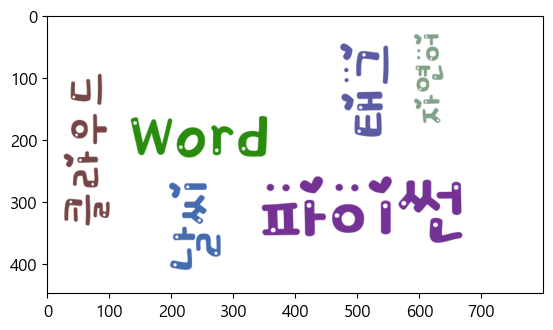

In [58]:
# 화면에 출력
import matplotlib.pyplot as plt
import matplotlib.image
img = matplotlib.image.imread('wordcloud_test.png')
imgplot = plt.imshow(img)
plt.show()

### wordcloud 패키지를 이용해서 이미지 안에 Word Cloud

In [59]:
!pip install wordcloud

     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00


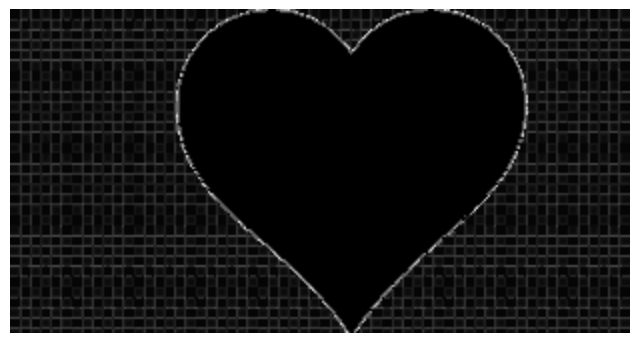

In [62]:
from PIL import Image

# 이미지 파일 가져오기
mask = np.array(Image.open('./data/h.png'))

plt.figure(figsize = (8, 6))
plt.imshow(mask, cmap = plt.cm.gray, interpolation = 'bilinear')
plt.axis('off')
plt.show()

{'Python Python': 1.0, 'Patch Patch': 0.40476190476190477, 'gray gray': 0.38095238095238093, 'Pypy Pypy': 0.30952380952380953, 'Ray Ray': 0.2619047619047619}


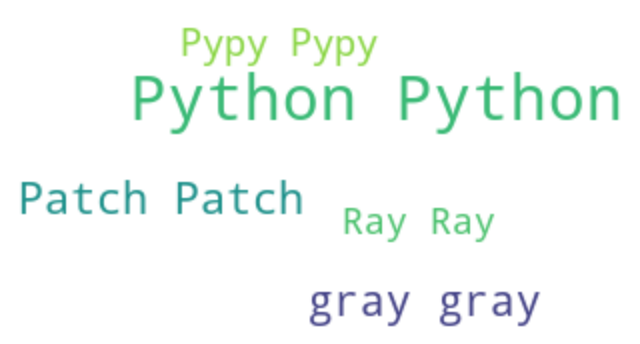

In [68]:
# 문자열 만들기

text = ''

# 단어 인식을 위해 공백이 필요
for i in range(10):
    text += 'Python '
for i in range(6):
    text += 'gray '
for i in range(8):
    text += 'Pypy '
for i in range(15):
    text += 'Python '
for i in range(12):
    text += 'Ray '
for i in range(9):
    text += 'Patch '    
for i in range(10):
    text += 'Python '
for i in range(10):
    text += 'Python '    
for i in range(12):
    text += 'gray ' 
for i in range(10):
    text += 'Patch '
for i in range(7):
    text += 'Pypy '  
for i in range(7):
    text += 'testT '
for i in range(1):
    text += 'Python '    
    
#print(text)

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
# 불용어 추가
stopwords.add('testT')

# 이전에 설정한 mask 를 사용
wordcloud = WordCloud(background_color = 'white', max_words = 2000,
                     mask = mask, stopwords = stopwords)

wordcloud = wordcloud.generate(text)
print(wordcloud.words_)
# word cloud 를 생성하고 각 단어에 대한 비율을 저장

plt.figure(figsize = (8, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

## 동아일보 뉴스 기사 내용을 가지고 Word Cloud 만들기

In [ ]:
# Web의 정적 컨텐츠를 다운로드 받기 위한 패키지
import requests
from urllib.parse import quote

# HTML 파싱을 위한 패키지
from bs4 import BeautifulSoup


In [82]:
# 검색어 입력받기
keyword = input('검색어 : ')
# 한국어 검색을 대비해서 검색어를 인코딩 - quote 사용
target_URL = 'https://www.donga.com/news/search?p=1&query=' + quote(keyword) +'&sorting=1&check_news=91&search_date=1&v1=&v2=&more=1'

source_code = requests.get(target_URL)
#print(source_code.text)

# HTML 파싱 객체 생성
bs = BeautifulSoup(source_code.text, 'html.parser')

# 파싱
# 선택자는 중복이 가능하기 때문에 list로 리턴
tags = bs.select('#content > div.sch_cont > div.schcont_wrap > div > div.cntPageBox > div.cntPage > span')
#print(tags)
# 기사의 건수(몇개인지) 찾기
# 천 단위 구분기호 제거해서 int 로 변환
count = int((tags[0].getText()[:-1]).replace(',', ''))
print('기사 건수 :', count)

검색어 : 추석
기사 건수 : 27077


In [95]:
# 실제 크롤링 할 기사 건수 입력받기
read_count = int(input('읽을 기사 수 : '))
if read_count > count:
    read_count = count

# 읽을 페이지 수 생성
# 소수 부분이 있으면 다음 페이지를 만들 수 있도록
page_num = int(read_count / 15 + 0.99)
print(page_num)

읽을 기사 수 : 70
5


In [104]:
# 다운로드 받은 텍스트를 저장할 파일을 개방
# 파일이 없으면 새로 생성해서 open
output_file = open(keyword + '.txt', 'w', encoding = 'utf8')

# 페이지 순회를 위한 URL 수정
for i in range(page_num):
    current_p = 1 + i * 15
    target_URL = 'https://www.donga.com/news/search?p='+ str(current_p) + '&query=' + quote(keyword) +'&sorting=1&check_news=1&search_date=1&v1=&v2=&more=1'
    #print(target_URL)
    
    # 각 검색 페이지의 데이터 읽어오기
    source_code = requests.get(target_URL)
    
    # 실제로 읽어올 기사는 페이지 안에서 추가로 링크가 필요
    bs = BeautifulSoup(source_code.text, 'html.parser')
    links = bs.select('div > div:nth-child(2) > div.rightList > span.tit > a')
    #print(links)
    for link in links:
        title_link = link['href']
        #print(title_link)
        # 페이지 내의 상세 기사 링크에 접속
        source_code = requests.get(title_link)
        bs = BeautifulSoup(source_code.text, 'html.parser')
        # 기사 내부에서 텍스트 부분의 selector(선택자) 찾기
        articles = bs.select('#article_txt')
        if articles != None:
            for article in articles:
                #print(article.getText())
                # string 으로 변환해서 output file에 write
                string_item = str(article.find_all(text = True))
                output_file.write(string_item)

# 파일 close
output_file.close()
    

In [105]:
# 한글 형택소 분석기를 활용하여 한글 텍스트 추출

from konlpy.tag import Twitter
# 읽기 전용으로 open
open_text_file = open(keyword + '.txt', 'r', encoding = 'utf8')
# 파일 읽기
text = open_text_file.read()
# 형태소 분석
spliter = Twitter()
nouns = spliter.nouns(text)

open_text_file.close()
print(nouns)

C:\Users\USER\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['문화', '체육관', '광부', '블루', '하우스', '콘서트', '를', '시작', '청와대', '일대', '야외', '콘서트', '개최', '청와대', '헬기장', '블루', '하우스', '콘서트', '지난달', '관람', '신청', '시작', '석', '매진', '등', '관심', '첫날', '공연', '피아니스트', '선우', '권', '연', '미국', '반', '이번', '콩쿠르', '한국인', '최초', '우승', '거머', '선우', '권', '홍', '원', '지휘자', '국립', '심포니', '오케스트라', '파가니니', '주제', '랩소디', '를', '협', '낭만', '라흐마니노프', '선율', '선우', '권', '손끝', '피어', '청와대', '가을', '일', '예정', '국립', '심포니', '오케스트라', '차이콥스키', '예브게', '중', '폴로네즈', '팬텀', '싱어', '준우승팀', '라비', '던스', '로', '이름', '소리', '열', '팝', '그룹', '마마', '무', '의', '별', '솔', '무대', '다음', '날인', '국립오페라단', '한국', '대표', '성악가', '가을', '음악', '선사', '세계', '오페라', '축제', '독일', '바이로이트', '페스티벌', '주역', '가수', '활동', '지난해', '독일어권', '최고', '영예', '궁정', '가수', '칭호', '베이스', '바리톤', '사무엘', '윤', '비롯', '바리톤', '양준', '모', '소프라노', '경', '등', '출연', '트', '라비', '아타', '금강산', '등', '유명', '오페라', '아리아', '우리', '가곡', '화합', '치유', '노래', '한국', '입양', '어린이', '합창단', '감동', '전', '예정', '청와대', '정원', '뮤직', '페스티벌', '이', '국악', '기반', '팝', '트로트', '재즈', '등', '장르', '아티스트', '참여', '안숙선'

전체 단어 개수 : 1119
중복을 제외한 단어 개수 : 605
<FreqDist with 605 samples and 1119 outcomes>


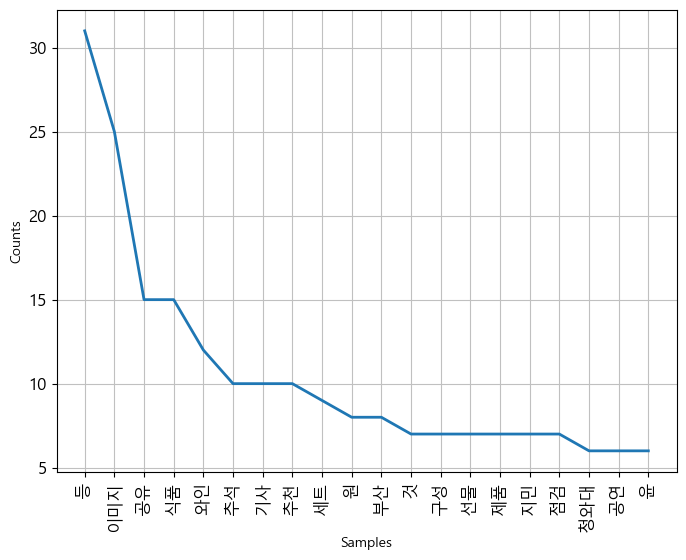

In [108]:
# 단어의 갯수와 등장 횟수 확인

ko = nltk.Text(nouns, name = keyword)
print('전체 단어 개수 :', len(ko.tokens))
print('중복을 제외한 단어 개수 :', len(set(ko.tokens)))
print(ko.vocab())

# 단어를 가지고 그래프 그리기

plt.figure(figsize = (8, 6))
# 상위 20개 단어로 그리기
ko.plot(20)
plt.show()

In [115]:
# 불용어 제거
stop_words = ['등', '공유', '원', '것', '윤', '이미지', '를', '또', '고']
ko1 = [each_word for each_word in ko if each_word not in stop_words]
ko2 = [each_word for each_word in ko1 if len(each_word) > 1]
print(ko2)

['문화', '체육관', '광부', '블루', '하우스', '콘서트', '시작', '청와대', '일대', '야외', '콘서트', '개최', '청와대', '헬기장', '블루', '하우스', '콘서트', '지난달', '관람', '신청', '시작', '매진', '관심', '첫날', '공연', '피아니스트', '선우', '미국', '이번', '콩쿠르', '한국인', '최초', '우승', '거머', '선우', '지휘자', '국립', '심포니', '오케스트라', '파가니니', '주제', '랩소디', '낭만', '라흐마니노프', '선율', '선우', '손끝', '피어', '청와대', '가을', '예정', '국립', '심포니', '오케스트라', '차이콥스키', '예브게', '폴로네즈', '팬텀', '싱어', '준우승팀', '라비', '던스', '이름', '소리', '그룹', '마마', '무대', '다음', '날인', '국립오페라단', '한국', '대표', '성악가', '가을', '음악', '선사', '세계', '오페라', '축제', '독일', '바이로이트', '페스티벌', '주역', '가수', '활동', '지난해', '독일어권', '최고', '영예', '궁정', '가수', '칭호', '베이스', '바리톤', '사무엘', '비롯', '바리톤', '양준', '소프라노', '출연', '라비', '아타', '금강산', '유명', '오페라', '아리아', '우리', '가곡', '화합', '치유', '노래', '한국', '입양', '어린이', '합창단', '감동', '예정', '청와대', '정원', '뮤직', '페스티벌', '국악', '기반', '트로트', '재즈', '장르', '아티스트', '참여', '안숙선', '어린이', '국악', '이상', '밴드', '국악', '창작', '그룹', '자루', '옥주현', '선예', '이찬원', '장민호', '출연', '토요일', '녹지', '정원', '사철', '사색', '진행', '국립국악원', '창작', '악단', '민속', '악단', '

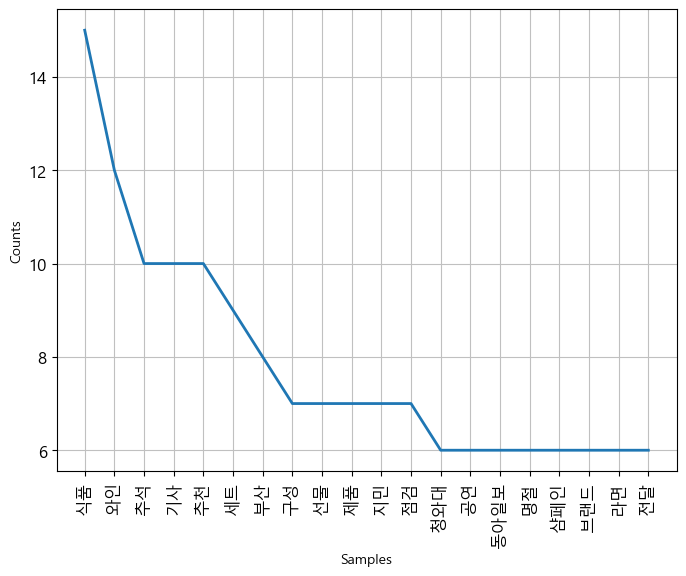

In [116]:
# 불용어를 제거한 결과 확인

ko = nltk.Text(ko2, name = keyword)

plt.figure(figsize = (8, 6))
# 상위 20개 단어로 그리기
ko.plot(20)
plt.show()

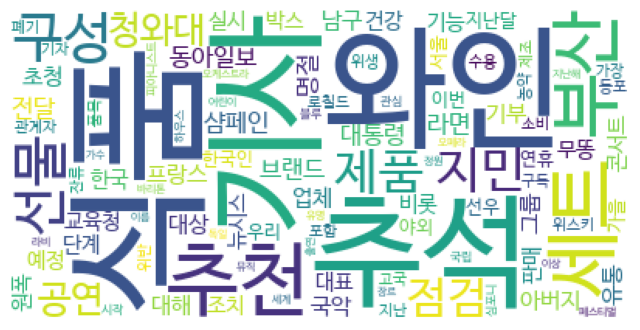

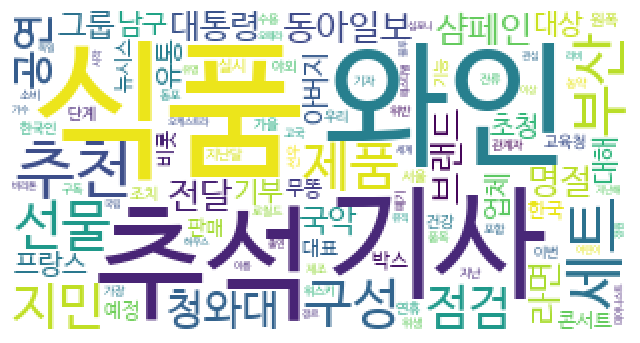

In [121]:
# 상위 100개 단어 선정
data = ko.vocab().most_common(100)

# word cloud 만들기
word_cloud = WordCloud(relative_scaling = 0.5, font_path = './data/NanumBarunGothic.ttf',
                      background_color = 'white').generate_from_frequencies(dict(data))
plt.figure(figsize = (8, 6))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

# 가운데를 제외한 나머지가 비어있는 이미지가 아니라서
# mask 를 적용해도 기존과 동일하게 직사각형으로 워드 클라우드가 구성됨
mask = np.array(Image.open('./data/h.png'))
word_cloud = WordCloud(relative_scaling = 0.5, font_path = './data/NanumBarunGothic.ttf',
                      background_color = 'white', mask = mask).generate_from_frequencies(dict(data))
plt.figure(figsize = (8, 6))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### 뉴스 그룹 분류

In [122]:
# 데이터 가져오기
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset = 'all', random_state = 21)
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [124]:
# 분포 확인
print(pd.Series(news_data.target).value_counts().sort_index())

0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64


In [125]:
# 클래스 이름 확인
print(news_data.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [126]:
# 데이터 확인 - 뉴스 기사
print(news_data.data[0])
# 데이터를 확인해보면 기사의 내용 뿐만 아니라 제목, 작성자,
# 소속, 이메일 등이 포함되어 있어서 이런 부분은 제거하고 사용해야 함
# 이 경우는 데이터를 가져올 때 remove 옵션에 headers, footers, quotes 를
# 설정하면 텍스트만 넘어옴

From: hallam@dscomsa.desy.de (Phill Hallam-Baker)
Subject: Re: re: fillibuster
Lines: 55
Reply-To: hallam@zeus02.desy.de
Organization: DESYDeutsches Elektronen Synchrotron, Experiment ZEUS bei HERA


In article <1993Apr12.002302.5262@martha.utcc.utk.edu>, PA146008@utkvm1.utk.edu (David Veal) writes:

|>>Come to that under the original plan there wasn't meant to be anything
|>>much for the federal government to do except keep the British out.
|>
|>       That's also untrue, but at least we're wandering a little closer
|>toward reality.  That the Articles of Confederation fell apart is enough
|>proof it was there for just a tad bit more.

Well yes and no. The Federalist papers are propaganda and it is therefore
difficult to determine precisely what Maddison etc were up to from them. They
certainly emphasised a limited role for the federal government but this
was not necessarily their true position.

|>>And like the house of lords which it is copied from it was given pretty
|>>wide powers